Dia 1

O desafio consiste em apenas unificar todos os dados de empréstimo em um único DataFrame e mesclar os dados exemplares ao DataFrame criado, relacionando o código de barras de cada livro.

In [163]:
import pandas as pd

In [164]:
lista_emprestimos = ['./Datasets/dados_emprestimos/emprestimos-20101.csv', './Datasets/dados_emprestimos/emprestimos-20102.csv', 
                     './Datasets/dados_emprestimos/emprestimos-20111.csv', './Datasets/dados_emprestimos/emprestimos-20112.csv',
                     './Datasets/dados_emprestimos/emprestimos-20121.csv', './Datasets/dados_emprestimos/emprestimos-20122.csv',
                     './Datasets/dados_emprestimos/emprestimos-20131.csv', './Datasets/dados_emprestimos/emprestimos-20132.csv',
                     './Datasets/dados_emprestimos/emprestimos-20141.csv', './Datasets/dados_emprestimos/emprestimos-20142.csv',
                     './Datasets/dados_emprestimos/emprestimos-20151.csv', './Datasets/dados_emprestimos/emprestimos-20152.csv',
                     './Datasets/dados_emprestimos/emprestimos-20161.csv', './Datasets/dados_emprestimos/emprestimos-20162.csv',
                     './Datasets/dados_emprestimos/emprestimos-20171.csv', './Datasets/dados_emprestimos/emprestimos-20172.csv', 
                     './Datasets/dados_emprestimos/emprestimos-20181.csv', './Datasets/dados_emprestimos/emprestimos-20182.csv',
                     './Datasets/dados_emprestimos/emprestimos-20191.csv', './Datasets/dados_emprestimos/emprestimos-20192.csv',
                     './Datasets/dados_emprestimos/emprestimos-20201.csv']

emprestimos = pd.read_csv(lista_emprestimos[0])

In [165]:
for i in range(len(lista_emprestimos)):
    dados = pd.read_csv(lista_emprestimos[i])
    emprestimos = pd.concat([emprestimos, dados], axis=0, join='outer', sort=True)


In [166]:
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2353375 entries, 0 to 26560
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   codigo_barras         object 
 1   data_devolucao        object 
 2   data_emprestimo       object 
 3   data_renovacao        object 
 4   id_emprestimo         int64  
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 143.6+ MB


In [167]:
dados_exemplares = pd.read_parquet('./Datasets/dados_exemplares.parquet')

emprestimos = pd.merge(emprestimos, dados_exemplares, how='outer', sort=True)

In [168]:
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664721 entries, 0 to 2664720
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   codigo_barras         object 
 1   data_devolucao        object 
 2   data_emprestimo       object 
 3   data_renovacao        object 
 4   id_emprestimo         float64
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           float64
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
 12  registro_sistema      float64
dtypes: float64(5), object(8)
memory usage: 264.3+ MB


In [169]:
emprestimos = emprestimos[['id_emprestimo', 'id_exemplar', 'codigo_barras', 'data_emprestimo', 'data_devolucao', 'data_renovacao',
                          'matricula_ou_siape', 'tipo_vinculo_usuario',
                          'colecao', 'biblioteca', 'status_material',
                          'localizacao', 'registro_sistema']]

emprestimos.sort_values('id_emprestimo', inplace=True)
emprestimos.reset_index(drop=True, inplace=True)
emprestimos.head()


,id_emprestimo,id_exemplar,codigo_barras,data_emprestimo,data_devolucao,data_renovacao,matricula_ou_siape,tipo_vinculo_usuario,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
2,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
3,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
4,709685.0,70865.0,L167050,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0


In [170]:
print(emprestimos.duplicated().sum())

95435


In [171]:
emprestimos.drop_duplicates(inplace=True)
emprestimos.reset_index(drop=True, inplace=True)
emprestimos.head()

,id_emprestimo,id_exemplar,codigo_barras,data_emprestimo,data_devolucao,data_renovacao,matricula_ou_siape,tipo_vinculo_usuario,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709685.0,70865.0,L167050,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0
2,709686.0,195347.0,2006017618,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2010/01/26 08:07:01.738000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,75019.0
3,709687.0,131639.0,L184117,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2010/01/18 11:07:46.470000000,2.007211e+08,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,44494.0
4,709688.0,225646.0,2007027500,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2010/01/19 15:59:26.464000000,2.009046e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,91736.0


Dia 2

O desafio consistia em atualizar os dados do DataFrame criando uma nova coluna relacionando as identificações dos números da coluna "localizacao" com base no CDU geral:

.000 a 099: Generalidades. Ciência e conhecimento.

.100 a 199: Filosofia e psicologia.

.200 a 299: Religião.

.300 a 399: Ciências sociais.

.400 a 499: Classe vaga. Provisoriamente não ocupada.

.500 a 599: Matemática e ciências naturais.

.600 a 699: Ciências aplicadas.

.700 a 799: Belas artes.

.800 a 899: Linguagem. Língua. Linguística.

.900 a 999: Geografia. Biografia. História.

Além do mais, precisará ainda excluir a coluna "registro_sistema" que não está fazendo sentido para essa análise e modificar a coluna da matricula (“matricula_ou_siape”) que não está com um formato muito legível, transformando-a em formato 'String'.

In [172]:
emprestimos.drop(columns='registro_sistema', inplace=True)
emprestimos.head()

,id_emprestimo,id_exemplar,codigo_barras,data_emprestimo,data_devolucao,data_renovacao,matricula_ou_siape,tipo_vinculo_usuario,colecao,biblioteca,status_material,localizacao
0,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685.0,70865.0,L167050,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686.0,195347.0,2006017618,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2010/01/26 08:07:01.738000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687.0,131639.0,L184117,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2010/01/18 11:07:46.470000000,2.007211e+08,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709688.0,225646.0,2007027500,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2010/01/19 15:59:26.464000000,2.009046e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0


In [173]:
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569286 entries, 0 to 2569285
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         float64
 1   id_exemplar           float64
 2   codigo_barras         object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   data_renovacao        object 
 6   matricula_ou_siape    float64
 7   tipo_vinculo_usuario  object 
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
dtypes: float64(4), object(8)
memory usage: 235.2+ MB


In [174]:
emprestimos['matricula_ou_siape'] = emprestimos['matricula_ou_siape'].astype('string')
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569286 entries, 0 to 2569285
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         float64
 1   id_exemplar           float64
 2   codigo_barras         object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   data_renovacao        object 
 6   matricula_ou_siape    string 
 7   tipo_vinculo_usuario  object 
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
dtypes: float64(3), object(8), string(1)
memory usage: 235.2+ MB


In [175]:
import numpy as np

In [176]:
cdu = {0: 'Generalidades. Ciência e conhecimento',
       1: 'Filosofia e psicologia',
       2: 'Religião',
       3: 'Ciências sociais',
       4: 'Classe vaga. Provisoriamente não ocupada',
       5: 'Matemática e ciências naturais',
       6: 'Ciências aplicadas',
       7: 'Belas artes',
       8: 'Linguagem. Língua. Linguística',
       9: 'Geografia. Biografia. História'
}

In [177]:
emprestimos['CDU'] = np.floor(emprestimos['localizacao']/100)

In [178]:
emprestimos['CDU'] = emprestimos['CDU'].replace(cdu)
emprestimos.head()

,id_emprestimo,id_exemplar,codigo_barras,data_emprestimo,data_devolucao,data_renovacao,matricula_ou_siape,tipo_vinculo_usuario,colecao,biblioteca,status_material,localizacao,CDU
0,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2008023265.0,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas
1,709685.0,70865.0,L167050,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,NaN,2008023265.0,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas
2,709686.0,195347.0,2006017618,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2010/01/26 08:07:01.738000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas
3,709687.0,131639.0,L184117,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2010/01/18 11:07:46.470000000,200721119.0,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas
4,709688.0,225646.0,2007027500,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2010/01/19 15:59:26.464000000,2009045971.0,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas


Dia 3

Neste dia, a diretoria da biblioteca gostaria de entender se a quantidade de empréstimos está diminuindo, aumentando ou permanecendo igual ao decorrer dos últimos anos. Para isso, verificaremos qual é a quantidade total de exemplares emprestados por cada ano e plotar um gráfico de linhas e, logo em seguida, realizar uma análise  relação à visualização gerada.

A diretoria também gostaria de gerenciar melhor os recursos humanos da biblioteca de acordo com a demanda de trabalho existente. Por exemplo:

.Gerenciar a programação de férias dos colaboradores de acordo com os meses de menor demanda;

.Programar atividades que não sejam de atendimento ao usuário para períodos específicos de menor demanda.

Há uma suspeita interna de que os meses com maior número de exemplares emprestados sejam março e setembro, mas não foi realizada uma análise real sobre isso. Portanto, geraremos uma tabela com a quantidade total de exemplares emprestados por mês e descubrir quais meses são os que possuem a maior quantidade de empréstimos realizados. Plotaremos um gráfico de linhas.

Por fim, a diretoria também necessita que seja planejada uma programação diária das atividades. Por este motivo, verificaremos quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro. Plotaremos um gráfico de barras e analisaremos quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário.

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
emprestimos.isna().sum()

id_emprestimo            307507
id_exemplar              189257
codigo_barras                 0
data_emprestimo          307507
data_devolucao           313991
data_renovacao          1595459
matricula_ou_siape       310678
tipo_vinculo_usuario     307507
colecao                  189257
biblioteca               189257
status_material          189257
localizacao              189257
CDU                      189257
dtype: int64

Grafico 1 - Quantidade de empréstimos ao longo dos anos

In [181]:
emprestimos_anuais = emprestimos.copy()
colunas_retirar = emprestimos_anuais.columns
emprestimos_anuais.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo']], inplace=True)
emprestimos_anuais.dropna(inplace=True)
emprestimos_anuais.reset_index(drop=True, inplace=True)
emprestimos_anuais.isna().sum()

id_emprestimo      0
id_exemplar        0
data_emprestimo    0
dtype: int64

In [182]:
emprestimos_anuais['data_emprestimo'] = pd.to_datetime(emprestimos_anuais['data_emprestimo'])
emprestimos_anuais['ano'] = emprestimos_anuais['data_emprestimo'].dt.year
emprestimos_anuais['ano'] = emprestimos_anuais['ano'].astype(int)
emprestimos_anuais.drop(columns=['id_emprestimo', 'id_exemplar'], inplace=True)
emprestimos_anuais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 2 columns):
 #   Column           Dtype         
---  ------           -----         
 0   data_emprestimo  datetime64[ns]
 1   ano              int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 31.6 MB


In [183]:
emprestimos_anuais['data_emprestimo'] = [1 for x in emprestimos_anuais['data_emprestimo']]
emprestimos_anuais = emprestimos_anuais.groupby('ano').agg('sum')
emprestimos_anuais.rename(columns={'data_emprestimo': 'quantidade_emprestimos'}, inplace=True)
emprestimos_anuais

,quantidade_emprestimos
ano,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


Text(0, 0.5, '')

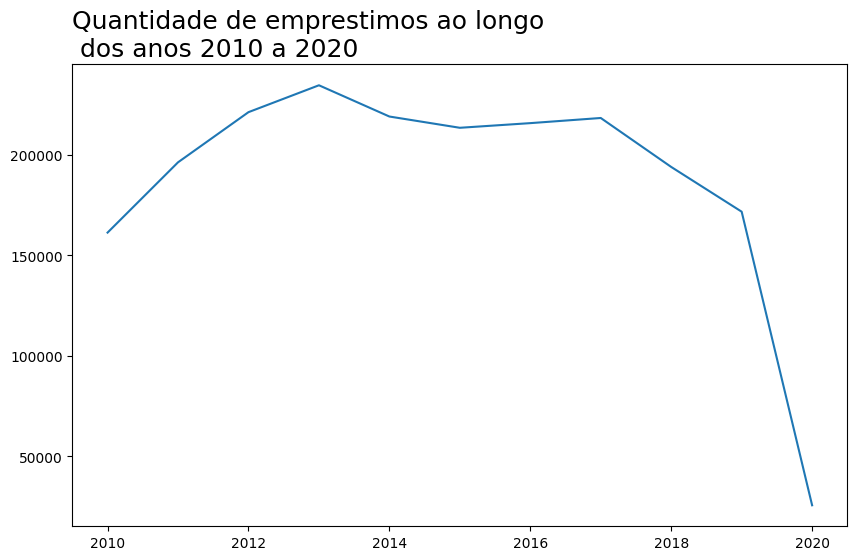

In [184]:
fig, ax= plt.subplots(figsize = (10,6))

#ponto a marcar
pontos = []

ax.plot(emprestimos_anuais.index, emprestimos_anuais['quantidade_emprestimos'])
ax.set_title('Quantidade de emprestimos ao longo\n dos anos 2010 a 2020', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')

Gráfico 2 - Quantidade mensal de emprestimos ao longo dos anos

In [185]:
emprestimos_mensal = emprestimos.copy()
colunas_retirar = emprestimos_mensal.columns
emprestimos_mensal.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo']], inplace=True)
emprestimos_mensal.dropna(inplace=True)
emprestimos_mensal.reset_index(drop=True, inplace=True)

In [186]:
emprestimos_mensal['data_emprestimo'] = pd.to_datetime(emprestimos_mensal['data_emprestimo'])
emprestimos_mensal['ano'] = emprestimos_mensal['data_emprestimo'].dt.year
emprestimos_mensal['mes'] = emprestimos_mensal['data_emprestimo'].dt.month
emprestimos_mensal['ano'] = emprestimos_mensal['ano'].astype(int)
emprestimos_mensal['mes'] = emprestimos_mensal['mes'].astype(int)
emprestimos_mensal.drop(columns=['id_emprestimo', 'id_exemplar'], inplace=True)
emprestimos_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   data_emprestimo  datetime64[ns]
 1   ano              int64         
 2   mes              int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 47.4 MB


In [187]:
emprestimos_mensal['data_emprestimo'] = [1 for x in emprestimos_mensal['data_emprestimo']]
emprestimos_mensal.rename(columns={'data_emprestimo': 'quantidade_emprestimo'}, inplace=True)
emprestimos_mensal = emprestimos_mensal.groupby(['ano','mes']).sum()
emprestimos_mensal.reset_index(inplace=True)
emprestimos_mensal

,ano,mes,quantidade_emprestimo
0,2010,1,4703
1,2010,2,10266
2,2010,3,19631
3,2010,4,16352
4,2010,5,15889
...,...,...,...
120,2020,1,3585
121,2020,2,10667
122,2020,3,11348
123,2020,5,8


In [188]:
emprestimos_mensal = pd.crosstab(index=emprestimos_mensal['mes'], columns=emprestimos_mensal['ano'], values=emprestimos_mensal['quantidade_emprestimo'], aggfunc='sum')
emprestimos_mensal

ano,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
mes,,,,,,,,,,,
1,4703.0,1516.0,7336.0,7907.0,15889.0,6612.0,5095.0,5100.0,5148.0,4623.0,3585.0
2,10266.0,13185.0,20789.0,25380.0,25817.0,26178.0,19847.0,19886.0,16969.0,21216.0,10667.0
3,19631.0,20086.0,28138.0,24877.0,20244.0,28662.0,27660.0,27739.0,23923.0,19877.0,11348.0
4,16352.0,18405.0,23688.0,26707.0,19034.0,23725.0,20348.0,20384.0,21835.0,18247.0,NaN
5,15889.0,20282.0,22517.0,22870.0,17376.0,21901.0,22730.0,22756.0,19431.0,16770.0,8.0
6,12551.0,16578.0,14237.0,13697.0,7029.0,12963.0,17360.0,17377.0,15494.0,10835.0,2.0
7,7018.0,8626.0,6286.0,15773.0,18910.0,14314.0,14616.0,14808.0,9651.0,13788.0,NaN
8,18337.0,24794.0,22703.0,24092.0,24223.0,20100.0,26434.0,27458.0,24886.0,19766.0,NaN
9,18448.0,23305.0,21607.0,24216.0,24750.0,16141.0,23619.0,21409.0,18080.0,16659.0,NaN


É notável que os dados não foram registrados em todo o ano de 2020, logo não podemos fazer uma análise ao longo dos meses, pois caso o contrário ela seria tendenciosa.

In [189]:
emprestimos_mensal = emprestimos_mensal.drop(2020,axis=1)

In [190]:
import plotly.express as px

In [191]:
fig = px.line(emprestimos_mensal, x=emprestimos_mensal.index, y=emprestimos_mensal.columns, markers=True)

fig.update_layout(title_text='Quantidade de emprestimos em cada mês ao longo de 2010 a 2019', font_size=14 ,xaxis_title='', yaxis_title='')

labels = ['Jan', 'Fev', 'Mar', 'Abr',
          'Mai', 'Jun', 'Jul', 'Ago',
          'Set', 'Out', 'Nov', 'Dez']
fig.update_xaxes(ticktext = labels, tickvals=emprestimos_mensal.index)



Grafico 3 - Quantidade de empréstimos diários

In [192]:
emprestimos_diario = emprestimos.copy()
colunas_retirar = emprestimos_diario.columns
emprestimos_diario.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo']], inplace=True)
emprestimos_diario.dropna(inplace=True)
emprestimos_diario.reset_index(drop=True, inplace=True)

In [193]:
emprestimos_diario['data_emprestimo'] = pd.to_datetime(emprestimos_diario['data_emprestimo'])
emprestimos_diario['ano'] = emprestimos_diario['data_emprestimo'].dt.year
emprestimos_diario['hora'] = emprestimos_diario['data_emprestimo'].dt.hour
emprestimos_diario['ano'] = emprestimos_diario['ano'].astype(int)
emprestimos_diario['hora'] = emprestimos_diario['hora'].astype(int)
emprestimos_diario.drop(columns=['id_emprestimo', 'id_exemplar'], inplace=True)
emprestimos_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   data_emprestimo  datetime64[ns]
 1   ano              int64         
 2   hora             int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 47.4 MB


In [194]:
emprestimos_diario['data_emprestimo'] = [1 for x in emprestimos_diario['data_emprestimo']]
emprestimos_diario.rename(columns={'data_emprestimo': 'quantidade_emprestimo'}, inplace=True)
emprestimos_diario_anuais = emprestimos_diario.copy()
emprestimos_diario_anuais.drop('ano', axis=1, inplace=True)
emprestimos_diario_anuais = emprestimos_diario.groupby(['ano','hora']).sum()
emprestimos_diario_anuais.reset_index(inplace=True)
emprestimos_diario_anuais

,ano,hora,quantidade_emprestimo
0,2010,7,1362
1,2010,8,8865
2,2010,9,11688
3,2010,10,14622
4,2010,11,14169
...,...,...,...
180,2020,17,2200
181,2020,18,2194
182,2020,19,966
183,2020,20,1194


C:\Users\luizh\AppData\Local\Temp\ipykernel_15692\2678957789.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




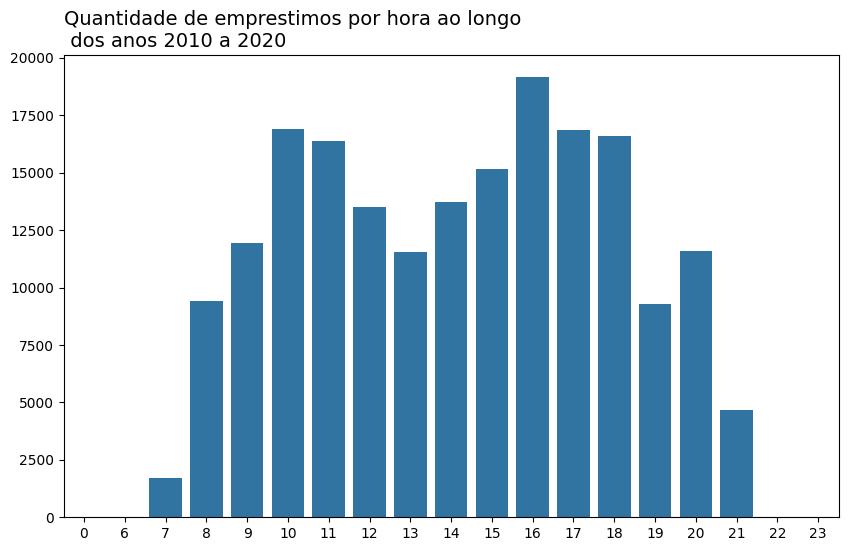

In [205]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(emprestimos_diario_anuais, x='hora', y='quantidade_emprestimo', ci=None)
ax.set_title('Quantidade de emprestimos por hora ao longo\n dos anos 2010 a 2020', loc='left', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [196]:
emprestimos_diario_anual = emprestimos_diario.copy()
emprestimos_diario_anuais = emprestimos_diario.groupby(['ano','hora']).sum()
emprestimos_diario_anuais.reset_index(inplace=True)
emprestimos_diario_anuais

,ano,hora,quantidade_emprestimo
0,2010,7,1362
1,2010,8,8865
2,2010,9,11688
3,2010,10,14622
4,2010,11,14169
...,...,...,...
180,2020,17,2200
181,2020,18,2194
182,2020,19,966
183,2020,20,1194


In [199]:
ex1 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2010]
ex2 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2011]
ex3 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2012]
ex4 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2013]
ex5 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2014]
ex6 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2015]
ex7 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2016]
ex8 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2017]
ex9 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2018]
ex10 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2019] 

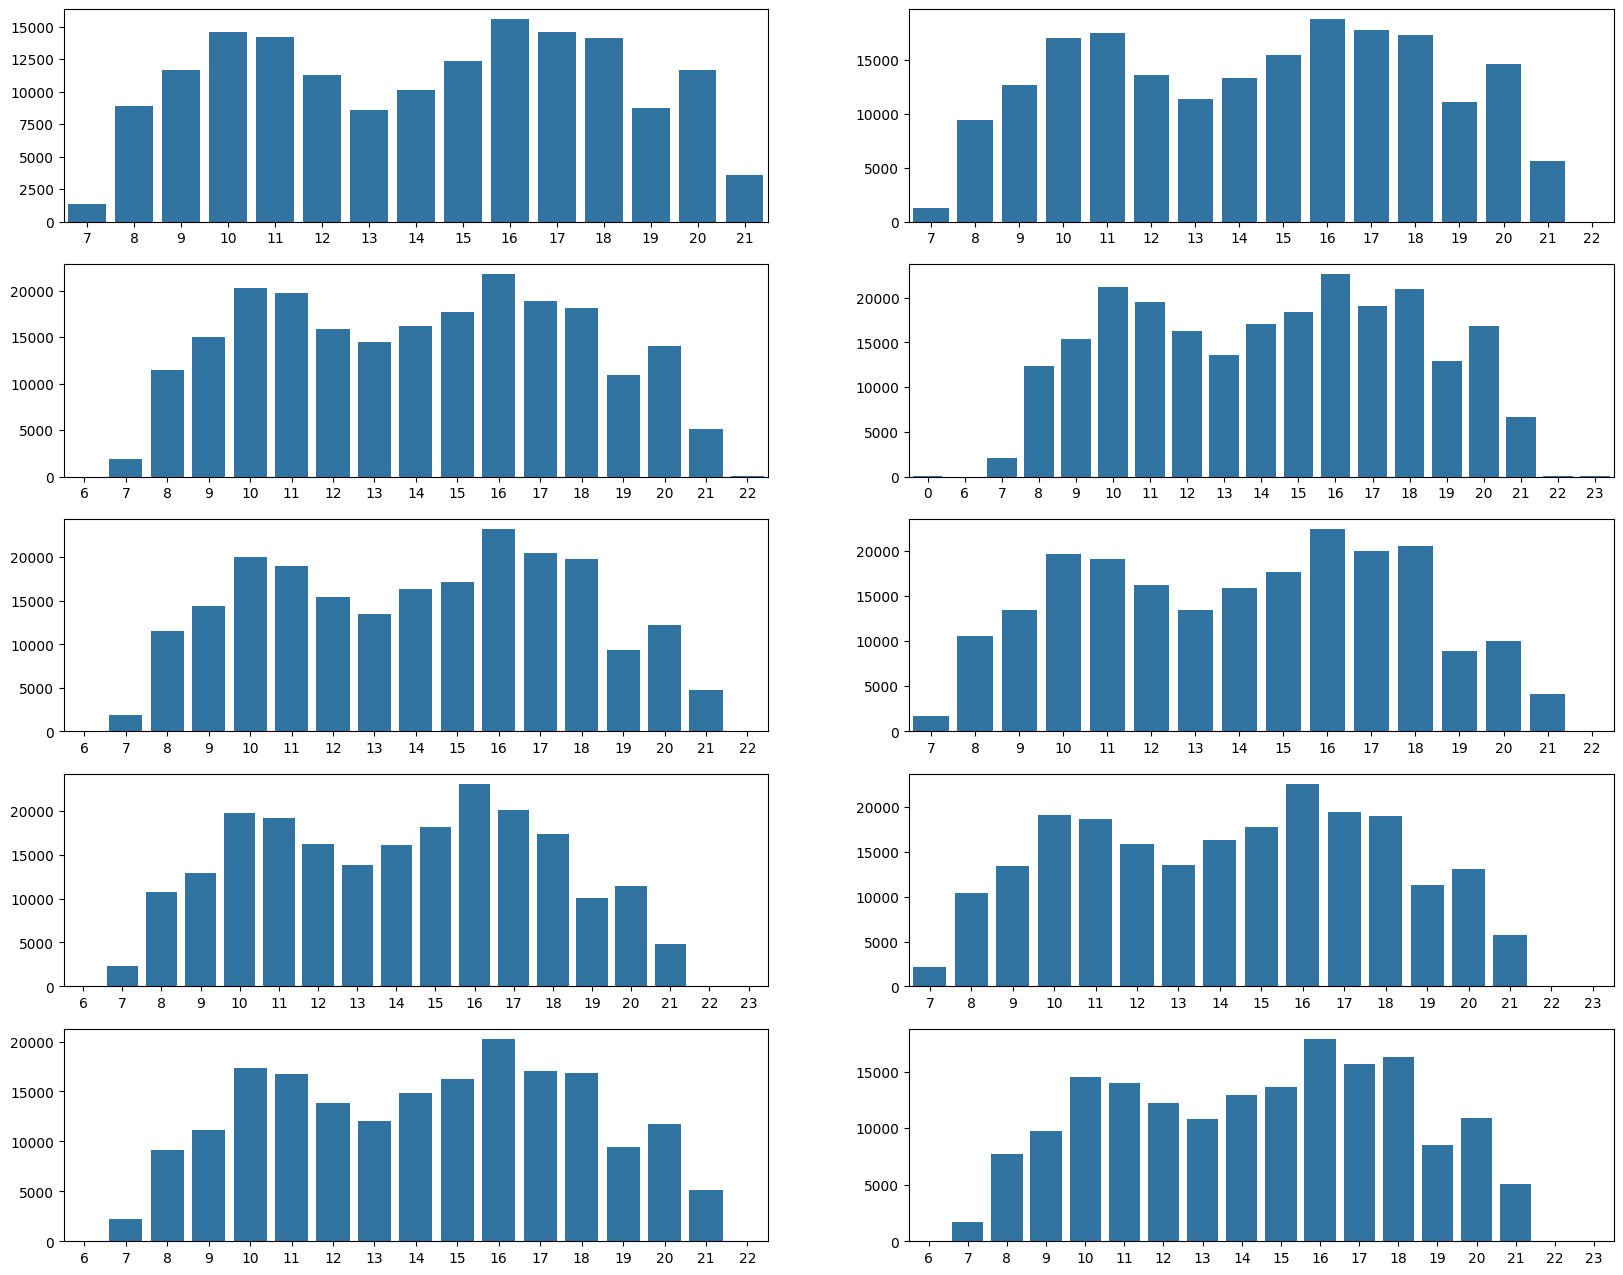

In [209]:
fig, ax = plt.subplots(5,2,figsize=(20,16))

sns.barplot(data=ex1, x='hora', y='quantidade_emprestimo', ax=ax[0, 0])
sns.barplot(data=ex2, x='hora', y='quantidade_emprestimo', ax=ax[0, 1])
sns.barplot(data=ex3, x='hora', y='quantidade_emprestimo', ax=ax[1, 0])
sns.barplot(data=ex4, x='hora', y='quantidade_emprestimo', ax=ax[1, 1])
sns.barplot(data=ex5, x='hora', y='quantidade_emprestimo', ax=ax[2, 0])
sns.barplot(data=ex6, x='hora', y='quantidade_emprestimo', ax=ax[2, 1])
sns.barplot(data=ex7, x='hora', y='quantidade_emprestimo', ax=ax[3, 0])
sns.barplot(data=ex8, x='hora', y='quantidade_emprestimo', ax=ax[3, 1])
sns.barplot(data=ex9, x='hora', y='quantidade_emprestimo', ax=ax[4, 0])
sns.barplot(data=ex10, x='hora', y='quantidade_emprestimo', ax=ax[4, 1])

for i in range(5):
    for j in range(2):
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')